# Delays por mes

<!--1. COMPLETAR QUE ARCHIVO CORRER PARA OBTENER LA MATRIZ DATA. El resultado esta en `smaller_data/OTP_por_mes.csv`-->
1. Correr tools `get_cant_vuelos.sh` y `get_delays_month.sh` para preprocesar y obtener todos los delays por mes y viajes.
2. Compilar el proyecto
3. Listar todos los datos preprocesados
4. CML!
5. Graficar y comparar
6. Calcular RMSE

In [1]:
# 1. correr local

In [2]:
# 2.
!cd .. && git submodule init
!cd .. && git submodule update
!cd .. && mkdir build
!cd ../build/ && rm -rf *
!cd ../build && cmake \
  -DPYTHON_EXECUTABLE="$(which python3)" \
  -DCMAKE_BUILD_TYPE=Release ..
!cd ../build && make install

mkdir: build: File exists
-- The C compiler identification is AppleClang 11.0.0.11000033
-- The CXX compiler identification is AppleClang 11.0.0.11000033
-- Check for working C compiler: /Applications/Xcode.app/Contents/Developer/Toolchains/XcodeDefault.xctoolchain/usr/bin/cc
-- Check for working C compiler: /Applications/Xcode.app/Contents/Developer/Toolchains/XcodeDefault.xctoolchain/usr/bin/cc -- works
-- Detecting C compiler ABI info
-- Detecting C compiler ABI info - done
-- Detecting C compile features
-- Detecting C compile features - done
-- Check for working CXX compiler: /Applications/Xcode.app/Contents/Developer/Toolchains/XcodeDefault.xctoolchain/usr/bin/c++
-- Check for working CXX compiler: /Applications/Xcode.app/Contents/Developer/Toolchains/XcodeDefault.xctoolchain/usr/bin/c++ -- works
-- Detecting CXX compiler ABI info
-- Detecting CXX compiler ABI info - done
-- Detecting CXX compile features
-- Detecting CXX compile features - done
Release mode
-- Found PythonInterp

In [3]:
!pwd

/Users/ilan/Code/tp3/notebooks


In [101]:
# 3. listando los datos
import numpy as np

'''
data = np.matrix(
    [
        [363497, 101263, 75937, 71455, 53984, 77751, 91174, 73281, 51912, 63241, 82429, 92645], #1994
        [439356, 88226, 95541, 82464, 86632, 105719, 89606, 92149, 61954, 80228, 94600, 142843], #1995
        [519396, 118091, 108184, 86422, 94651, 112313, 113297, 117013, 93412, 104171, 96095, 152186], #1996
        [443363, 103023, 100965, 90146, 77029, 107568, 105038, 100019, 66527, 84743, 94237, 119329], #1997
        [391213, 101589, 111011, 92414, 101170, 132069, 97768, 107005, 93502, 83598, 72963, 121889], #1998
        [430139, 88189, 102401, 109616, 110327, 134221, 137235, 114595, 95080, 95406, 84562, 103411], #1999
        [549320, 118875, 111273, 114192, 123360, 158602, 143559, 147598, 101447, 116310, 127079, 179217], #2000
        [348179, 130514, 131619, 106513, 98198, 129124, 117823, 129645, 158707, 67561, 63829, 85022], #2001
        [308717, 61262, 95911, 76336, 77608, 95757, 94676, 81101, 51809, 70672, 61403, 92497], #2002
        [406561, 117525, 97467, 69367, 80461, 94627, 113620, 116952, 75849, 75206, 104578, 133121], #2003
        [559393, 125246, 112518, 98892, 133045, 159248, 147712, 135272, 94163, 115906, 122073, 172532], #2004
        [563842, 126326, 142528, 98554, 100427, 151090, 182635, 156700, 99589, 111147, 113099, 165981], #2005
        [605748, 131672, 144541, 126351, 130988, 162580, 163384, 152139, 139088, 165701, 137620, 176618], #2006
        [647216, 185521, 170854, 149346, 139654, 201002, 196006, 185259, 109906, 137320, 120851, 219063], #2007
        [523610, 178984, 175120, 133580, 127213, 177470, 152558, 132010, 81885, 77654, 87227, 188861] #2008
    ]
)
'''

import pandas as pd

# ESTAR PARADO EN ROOT PARA CORRER 
df = pd.read_csv('../smaller_data/OTP_por_mes.csv')

df_group = df.groupby(['YEAR'])

data_array = []

for symbol, group in df_group:
    year = []
    for index, row in group.iterrows():
        year.append(row.value)
    data_array.append(year)
    
data = np.matrix(data_array)

### 4. CML!

Vamos a empezar probando algunas cositas.

Primero hacemos CML en cada año por si mismo y calculo su RMSE

$
RMSE(f) = \sqrt{\frac{1}{N}\sum_{i=0}^N e^2_{(i)}} \\
e(i) =y(i)−yˆ(i)
$

Para empezar probamos con una cuadratica...

In [102]:
import predict
import math

def cuadratica(x):
    return np.array([1, x, x*x]);

cml = predict.CML(cuadratica, len(cuadratica(0)))

N = 12
x = np.arange(1, N+1)

x_axis = []
rmses = []

coef = 0

for i in range(len(data)):
    x_axis.append(1994 + i)
    y = np.asarray(data[i]).reshape(-1)

    cml.fit(x, y)
    
    coef = cml.coef()
    
    e = []
    for j in range(N):
        e.append(y[j] - cml.predict(x[j]))
    
    rmse = 0
    for j in range(len(e)):
        rmse += e[j] ** 2
    rmse = rmse/N
    rmse = math.sqrt(rmse)
    
    rmse = rmse / (max(y) - min(y))
    
    rmses.append(rmse)

<BarContainer object of 15 artists>

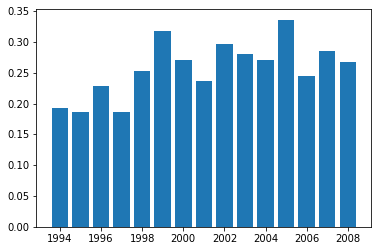

In [103]:
import matplotlib.pyplot as plt

plt.bar(x_axis, rmses)

Y el error medio:

In [104]:
sum(rmses)/len(rmses)

0.25666417675344616

A ver como arpoxima cada año...

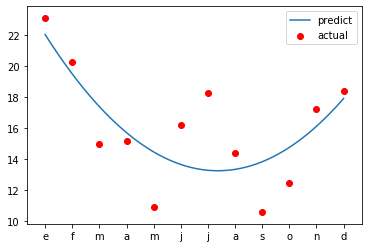

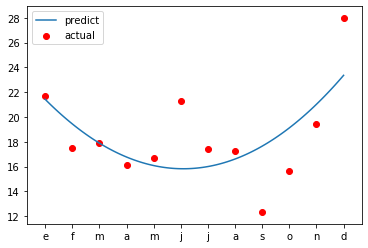

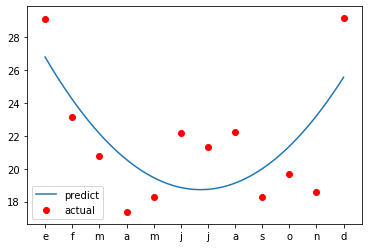

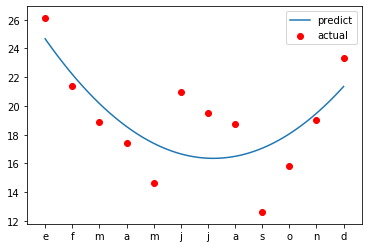

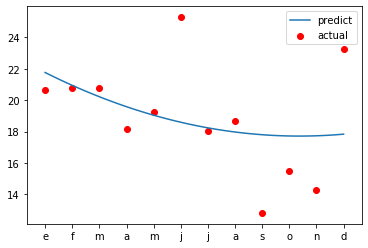

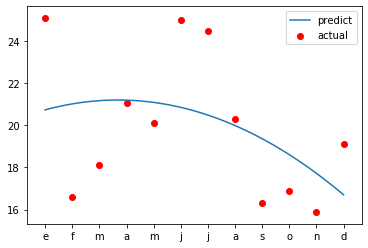

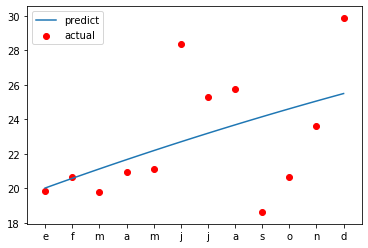

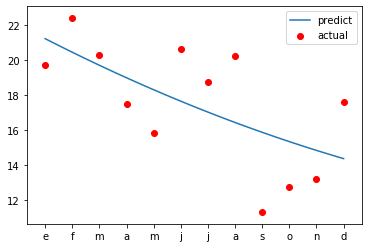

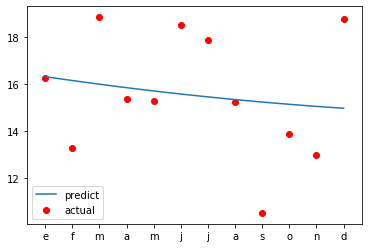

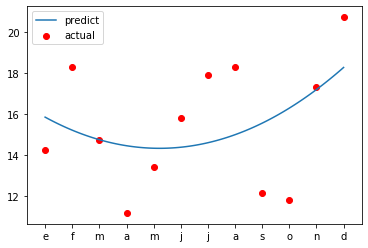

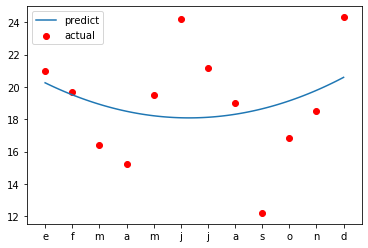

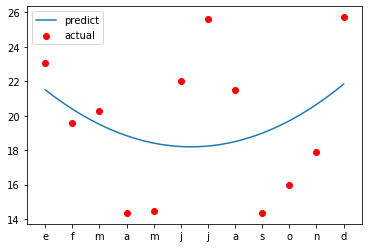

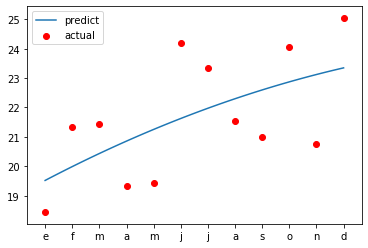

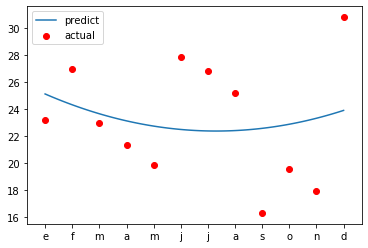

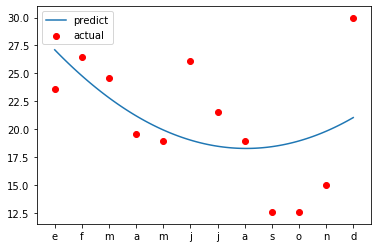

In [105]:
for i in range(len(data)):
    y = np.asarray(data[i]).reshape(-1)
    cml.fit(x, y)

    f_x_axis = np.arange(1, 12.1, 0.1)
    f_y_axis = [cml.predict(x) for x in f_x_axis]
    x_ticks = np.arange(1, 13, 1)

    data_x_axis = np.arange(1, 13, 1)
    data_y_axis = y

    fig, ax = plt.subplots()
    ax.plot(f_x_axis, f_y_axis, label="predict")
    ax.scatter(data_x_axis, data_y_axis, label="actual", color="r")
    ax.legend()

    plt.xticks(x_ticks, ["e","f","m","a","m","j","j","a","s","o","n","d"])

    plt.show()

No parece aproximar tan bien...

En general, parece que hay dos minimos, uno en abril y uno en septiembre. También un máximo local en junio/julio
Probemos con una función de grado 5

In [106]:
import math

def F(x):
    return np.array([1, x, math.pow(x, 2), math.pow(x, 3), math.pow(x, 4), math.pow(x, 5)]);

cml = predict.CML(F, len(F(0)))

rmses_2 = []

for i in range(len(data)):
    y = np.asarray(data[i]).reshape(-1)

    cml.fit(x, y)
    
    e = []
    for j in range(N):
        e.append(y[j] - cml.predict(x[j]))
    
    rmse = 0
    for j in range(len(e)):
        rmse += e[j] ** 2
    rmse = rmse/N
    rmse = math.sqrt(rmse)
    
    rmse = rmse / (max(y) - min(y))
    
    rmses_2.append(rmse)

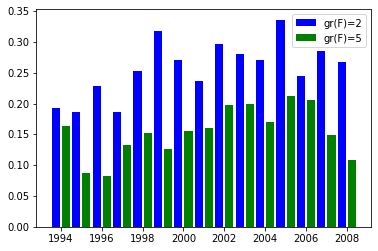

In [107]:
plt.clf()


X = np.array(x_axis)
p1 = plt.bar(X - 0.25, rmses, color = 'b', width = 0.40)
p2 = plt.bar(X + 0.25, rmses_2, color = 'g', width = 0.40)

plt.legend((p1[0], p2[0]), ('gr(F)=2', 'gr(F)=5'))

plt.show()

In [108]:
sum(rmses_2)/len(rmses_2)

0.15323678478105152

Un poco mejor no? :D

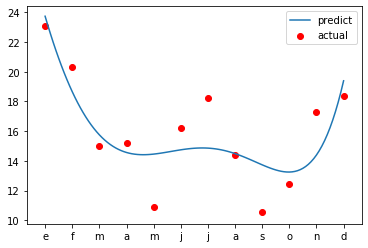

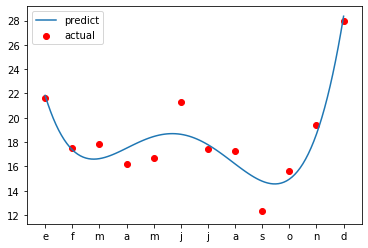

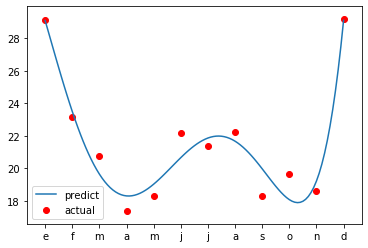

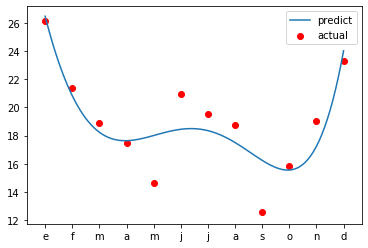

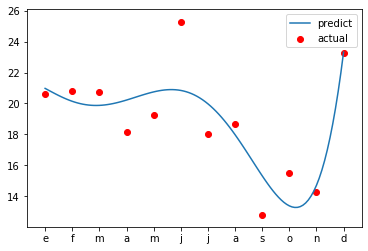

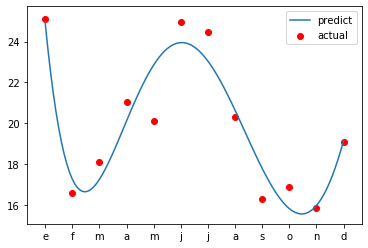

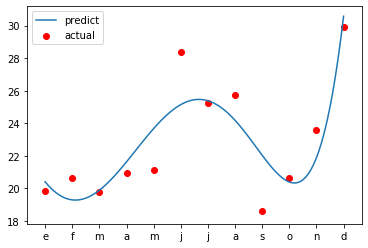

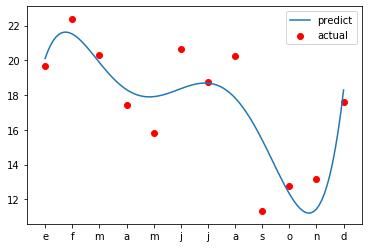

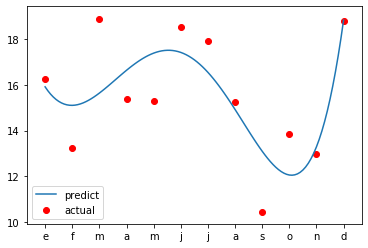

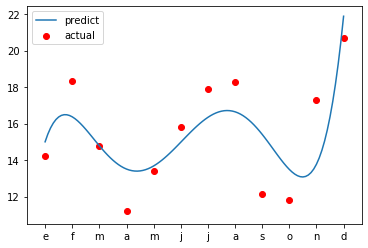

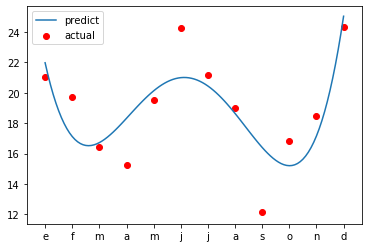

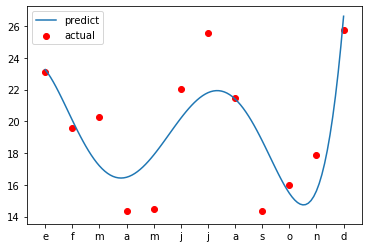

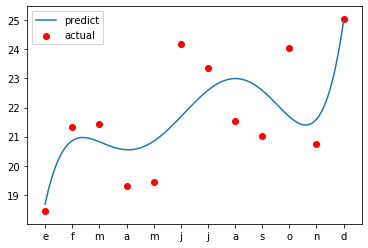

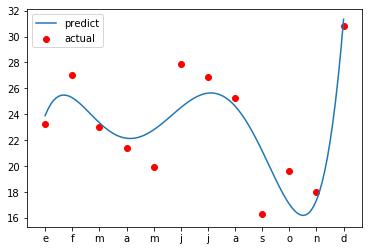

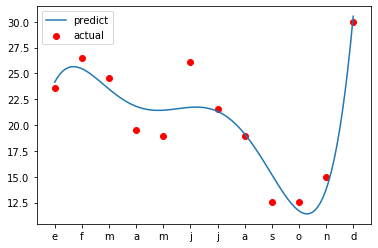

In [109]:
for i in range(len(data)):
    y = np.asarray(data[i]).reshape(-1)
    cml.fit(x, y)

    f_x_axis = np.arange(1, 12.1, 0.1)
    f_y_axis = [cml.predict(x) for x in f_x_axis]
    x_ticks = np.arange(1, 13, 1)

    data_x_axis = np.arange(1, 13, 1)
    data_y_axis = y

    fig, ax = plt.subplots()
    ax.plot(f_x_axis, f_y_axis, label="predict")
    ax.scatter(data_x_axis, data_y_axis, label="actual", color="r")
    ax.legend()

    plt.xticks(x_ticks, ["e","f","m","a","m","j","j","a","s","o","n","d"])

    plt.show()

Bastaaaante mejor ...


In [110]:
cml.coef()

array([ 1.25208694e+01,  2.02254272e+01, -1.06964972e+01,  2.32523229e+00,
       -2.23579296e-01,  7.77129737e-03])

Tambien podriamos intentar aproximar con un ciclo...
Empecemos con `cos` y alguna función simple extra para darle mejor forma.

Lo vamos a comparar contra las otras dos a ver como vamos mejorando.

In [111]:
def F(x):
    return np.array([1, x, math.pow(x, 2), math.cos(x)]);

cml = predict.CML(F, len(F(0)))

rmses_3 = []

for i in range(len(data)):
    y = np.asarray(data[i]).reshape(-1)

    cml.fit(x, y)
    
    e = []
    for j in range(N):
        e.append(y[j] - cml.predict(x[j]))
    
    rmse = 0
    for j in range(len(e)):
        rmse += e[j] ** 2
    rmse = rmse/N
    rmse = math.sqrt(rmse)
    
    rmse = rmse / (max(y) - min(y))
    
    rmses_3.append(rmse)

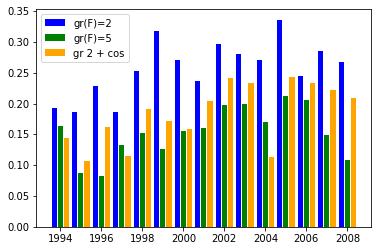

0.209225991687594


In [112]:
plt.clf()


X = np.array(x_axis)
p1 = plt.bar(X - 0.30, rmses, color = 'b', width = 0.25)
p2 = plt.bar(X, rmses_2, color = 'g', width = 0.25)
p3 = plt.bar(X + 0.30, rmses_3, color = 'orange', width = 0.25)

plt.legend((p1[0], p2[0], p3[0]), ('gr(F)=2', 'gr(F)=5', 'gr 2 + cos'))

plt.show()

print(rmse)

No mejoro...
Probemos con `cos` y la de grado 5...

In [113]:
def F(x):
    return np.array([1, x, math.pow(x, 2), math.pow(x, 3), math.pow(x, 4), math.pow(x, 5), math.cos(x)]);

cml = predict.CML(F, len(F(0)))

rmses_4 = []

for i in range(len(data)):
    y = np.asarray(data[i]).reshape(-1)

    cml.fit(x, y)
    
    e = []
    for j in range(N):
        e.append(y[j] - cml.predict(x[j]))
    
    rmse = 0
    for j in range(len(e)):
        rmse += e[j] ** 2
    rmse = rmse/N
    rmse = math.sqrt(rmse)
    
    rmse = rmse / (max(y) - min(y))
    
    rmses_4.append(rmse)

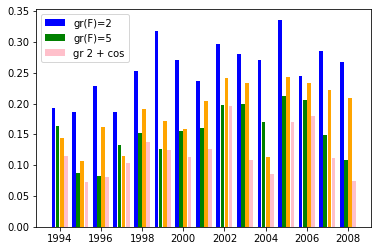

0.07492177828407437


In [114]:
plt.clf()


X = np.array(x_axis)
p1 = plt.bar(X - 0.30, rmses, color = 'b', width = 0.18)
p2 = plt.bar(X - 0.10, rmses_2, color = 'g', width = 0.18)
p3 = plt.bar(X + 0.10, rmses_3, color = 'orange', width = 0.18)
p3 = plt.bar(X + 0.30, rmses_4, color = 'pink', width = 0.18)

plt.legend((p1[0], p2[0], p3[0]), ('gr(F)=2', 'gr(F)=5', 'gr 2 + cos'))

plt.show()

print(rmse)

Es esta eh! Veamos como se comporta

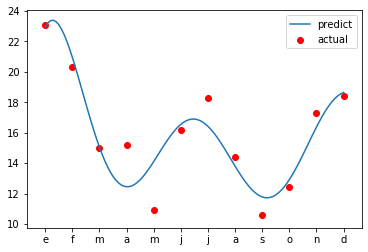

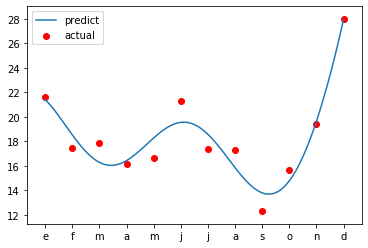

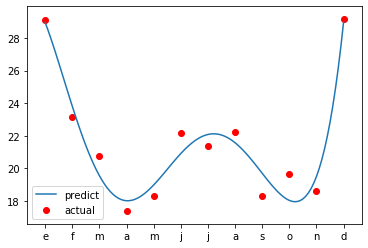

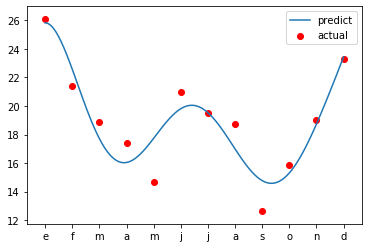

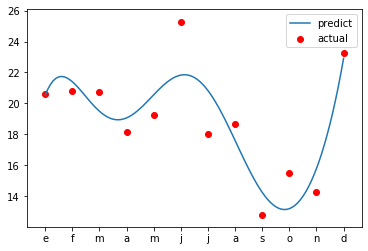

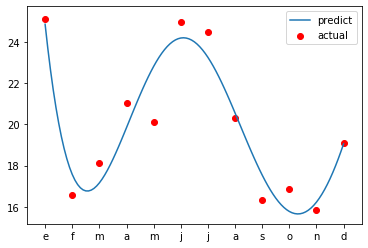

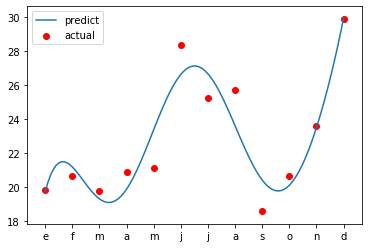

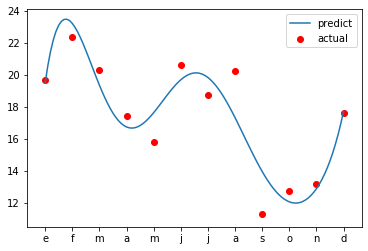

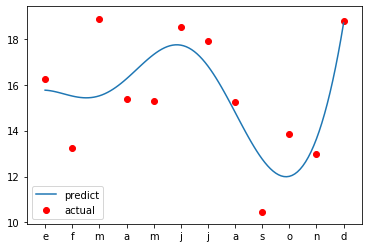

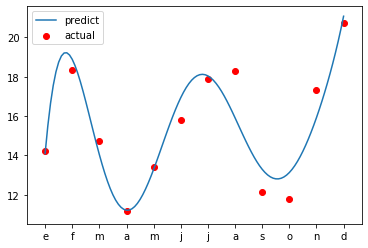

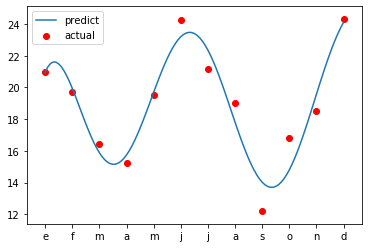

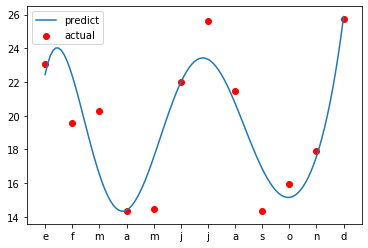

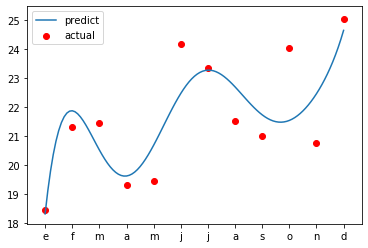

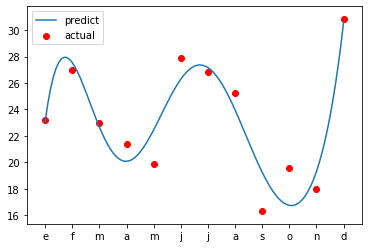

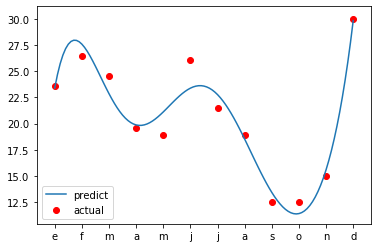

In [115]:
for i in range(len(data)):
    y = np.asarray(data[i]).reshape(-1)
    cml.fit(x, y)

    f_x_axis = np.arange(1, 12.1, 0.1)
    f_y_axis = [cml.predict(x) for x in f_x_axis]
    x_ticks = np.arange(1, 13, 1)

    data_x_axis = np.arange(1, 13, 1)
    data_y_axis = y

    fig, ax = plt.subplots()
    ax.plot(f_x_axis, f_y_axis, label="predict")
    ax.scatter(data_x_axis, data_y_axis, label="actual", color="r")
    ax.legend()

    plt.xticks(x_ticks, ["e","f","m","a","m","j","j","a","s","o","n","d"])

    plt.show()

In [100]:
print(cml.coef())

[-1.22968280e+01  5.14432379e+01 -2.19789973e+01  3.97314483e+00
 -3.25227277e-01  9.90271291e-03  4.74997374e+00]
